# Notebook for generating plots

In [2]:
import matplotlib.pyplot as plt

In [26]:
# function to read the data from the file
def read_data(filename):
    # if odd line number, then it is a solution
    # if even line number, then it is a cost
    # skip the last line
    # on new line, append to the list
    
    with open(filename, 'r') as f:
        lines = f.readlines()
        lines = lines[:-1]
        solutions = []
        costs = []
        for i in range(len(lines)):
            if i % 2 == 0:
                #solutions.append(lines[i][:-1])
                solutions.append(list(map(int,lines[i][:-2].split(' '))))
            else:
                costs.append(float(lines[i][:-1]))
    return solutions, costs


In [30]:
nn_solutions, nn_costs = read_data('nn_solutions.txt')
greedy_solutions, greedy_costs = read_data('greedy_solutions.txt')
steepest_solutions, steepest_costs = read_data('steepest_solutions.txt')

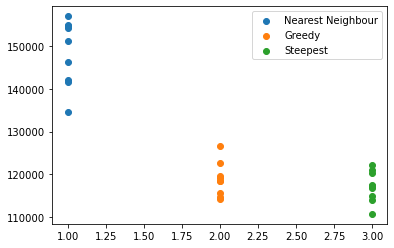

In [33]:
# scatter plot of the costs on y axis, type of algorithm on x axis
plt.scatter([1]*len(nn_costs), nn_costs, label='Nearest Neighbour')

plt.scatter([2]*len(greedy_costs), greedy_costs, label='Greedy')

plt.scatter([3]*len(steepest_costs), steepest_costs, label='Steepest')

plt.legend()
plt.show()